In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

note: runs with python >= 3.8 

In [3]:
# check python version
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [13]:
# load training dataset
# ds_fp = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset/merged_april_2016_9cam3bands.csv"
# ds_fp = "/Users/ehsanmos/Documents/MISR/MISR-SeaIceRoughness/post_processing/insample_atm_withPathOrbit_3cams_forTransect_oldCodeMethod_19apr_hr0-6_lon272-273.csv"
ds_fp = "/Users/ehsanmos/Documents/MISR/MISR-SeaIceRoughness/post_processing/insample_atm_withPathOrbit_3cams_forTransect_mymethod_19apr_hr0-6_lon272-273.csv"

# ds_fp = "/home/ehsan/misr_lab/training_dataset/april_2016/april_2016_parts/merged_april_2016_9cam_4bands_final_dataset_2.csv"
# ds_fp = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data/MisrAtmCalibratedModel_april_2016_testRun.csv"

in_ds = pd.read_csv(ds_fp)

In [14]:
in_ds.head(5)

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms,orbit_start,orbit_stop
0,1,106,86890,14,132.95,519.19,80.370866,272.809058,0.75534,1.07586,0.61394,9.24,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
1,2,106,86890,14,133.10,519.38,80.370774,272.805572,0.75652,1.07291,0.61511,9.29,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2,3,106,86890,14,133.25,519.57,80.370682,272.802085,0.75652,1.07291,0.61511,8.65,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
3,4,106,86890,14,133.12,519.40,80.370763,272.805148,0.75652,1.07291,0.61511,8.99,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
4,5,106,86890,14,133.04,519.12,80.371141,272.808817,0.75652,1.07291,0.61511,8.15,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00


In [15]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
xlon = in_ds['lon']
ylat = in_ds['lat']


margin = 2 # buffer to add to the range
lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [16]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

77.602564
82.62836
270.14776
274.999988


In [17]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [18]:
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

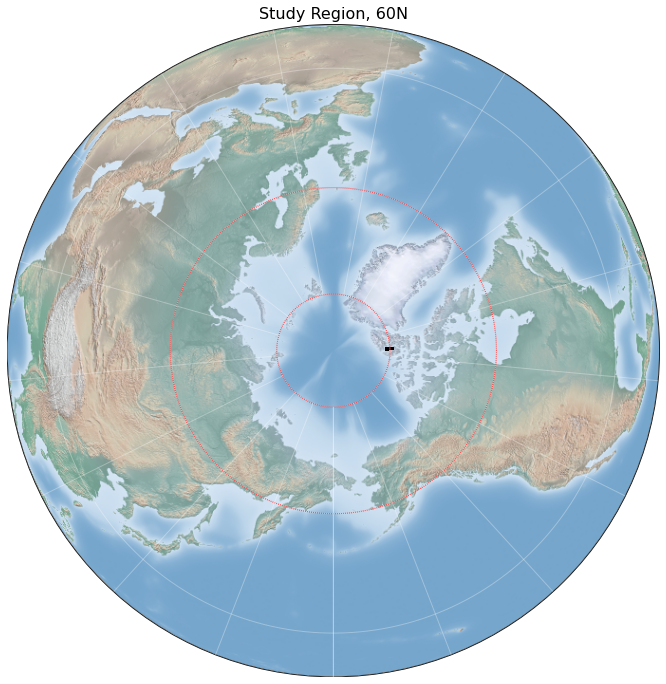

In [19]:
# run with oython >= 3.8

make_the_map(xlon, ylat)

In [11]:
xlon_subset = in_ds[' lon']
ylat_subset = in_ds[' lat']

0

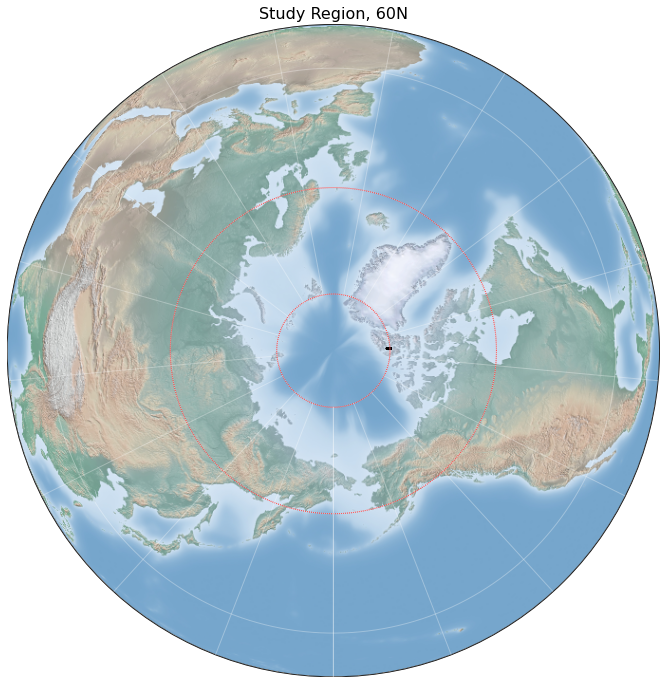

In [12]:
# run with python >= 3.8

make_the_map(xlon_subset, ylat_subset)